# Thresholding method

Threshold is a technique to define a pixel limit $T$. If a pixel is great than the $T$ value, this pixel is converted into $255$. If a pixel value is less than $T$ value, we convert it into $0$. This binary technique can help us in many tasks, for example,  find the contours present in the image or make masks.

There are three methods to proceed with the threshold process.
- Simple threshold (binary and inverse)
- Adaptive threshold (mean and Gaussian)
- Otsu and Riddler-Calvard method.

For this example, we consider an image of button football, the great Brazilian Team of 1982.

## Importing Libraries

In [1]:
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mahotas

## Loading image from disk

In [2]:
img = cv2.imread("images/but_foot.jpg")

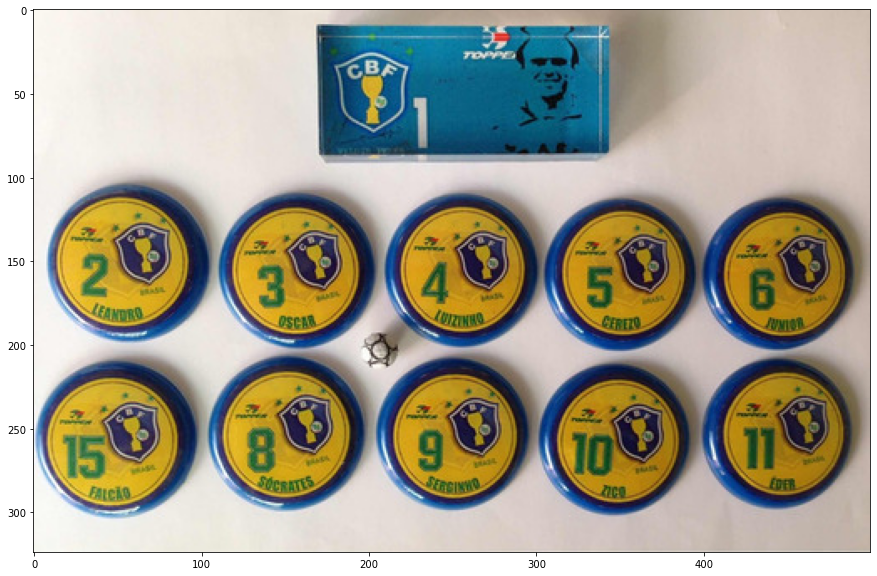

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Thresholding

**Simple threshold**

**from OpenCV website**

*Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY*.

Keep in mind, to realize the threshold method, we must convert the image into the gray scale and then, apply the blurring technique. Once these steps are made, we can go ahead.

In [4]:
# converting the image into gray scale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# applying the Gaussian blur
blurred = cv2.GaussianBlur(img, (5,5), 0)

In [5]:
# applying the simple threshold
(T, sthresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
# the second argument is the threshold, the third is the maximum value and, the last is the method
# applying the inverse threshold
(T, ithresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
# applying the bitwise operation with the inverse threshold
masked = cv2.bitwise_and(img, img, mask = ithresh)

**visualizing the results**

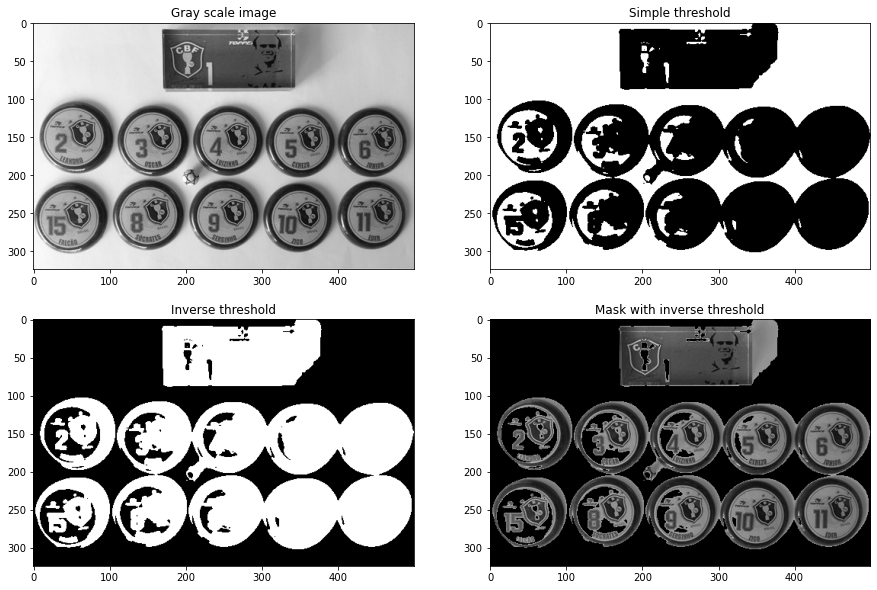

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Simple threshold")
plt.imshow(cv2.cvtColor(sthresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Inverse threshold")
plt.imshow(cv2.cvtColor(ithresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.title("Mask with inverse threshold")
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

plt.show()

**adaptive threshold**

**from OpenCV website**

*In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination*.

*In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:*

*The adaptiveMethod decides how the threshold value is calculated:*

- cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
- cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

*The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels*

In [7]:
# The most important arguments here are blocksize and the C parameter
# for the first example we consider a blocksize by 11,11 and C as 4
mthresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 4)
# for the second example we consider a blocksize by 15,15 and C as 3
gthresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 3)

# With small blocksize we can reach better results, the parameter C must be tested to find the optimal.

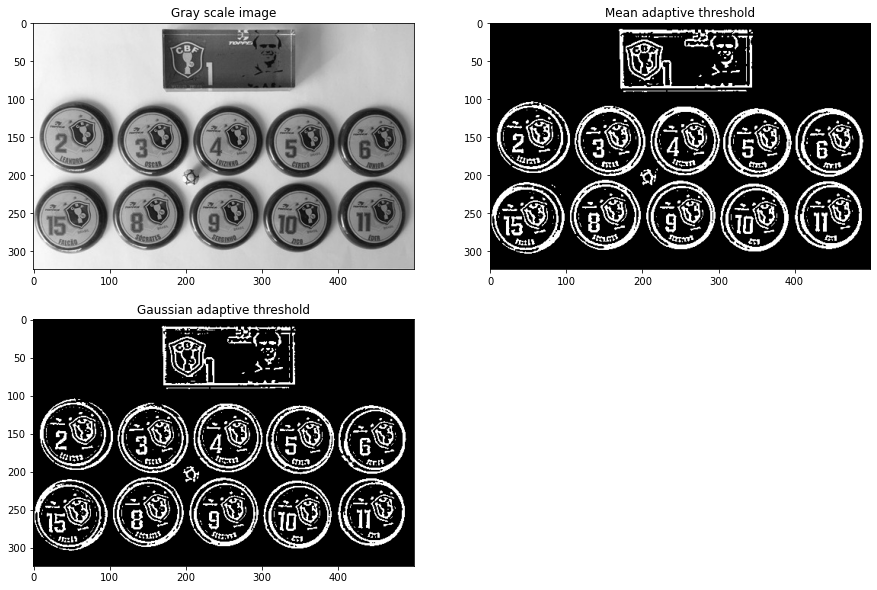

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Mean adaptive threshold")
plt.imshow(cv2.cvtColor(mthresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Gaussian adaptive threshold")
plt.imshow(cv2.cvtColor(gthresh, cv2.COLOR_BGR2RGB))
plt.show()

**Otsu and Riddler-Calvard**

**from OpenCV website**

*In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.*

*Consider an image with only two distinct image values (bimodal image), where the histogram would only consist of two peaks. A good threshold would be in the middle of those two values. Similarly, Otsu's method determines an optimal global threshold value from the image histogram.*

For this example, we do not follow the exactly OpenCV recommendations. We consider the mahoras library, that grab to us the threshold values, using the Otsu and Riddler-Calvard method. Once we have the threshold value, we apply some mask to change the pixels values and then, we apply the NOT bitwise operation.

In [9]:
# Otsu method
To = mahotas.thresholding.otsu(blurred)
print("Otsu’s threshold: {}".format(To))
othresh = img.copy()
othresh[othresh > T] = 255 # mask to set the pixels that are larger than T into 255
othresh[othresh < 255] = 0 # to set the pixels that are less than the T value
othresh = cv2.bitwise_not(othresh) # applying the mask operation

# Riddler-Calvard
Trc = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard’s threshold: {}".format(Trc))
rcthresh = img.copy()
rcthresh[rcthresh > T] = 255
rcthresh[rcthresh < 255] = 0
rcthresh = cv2.bitwise_not(rcthresh)

Otsu’s threshold: 147
Riddler-Calvard’s threshold: 146.79819612910552


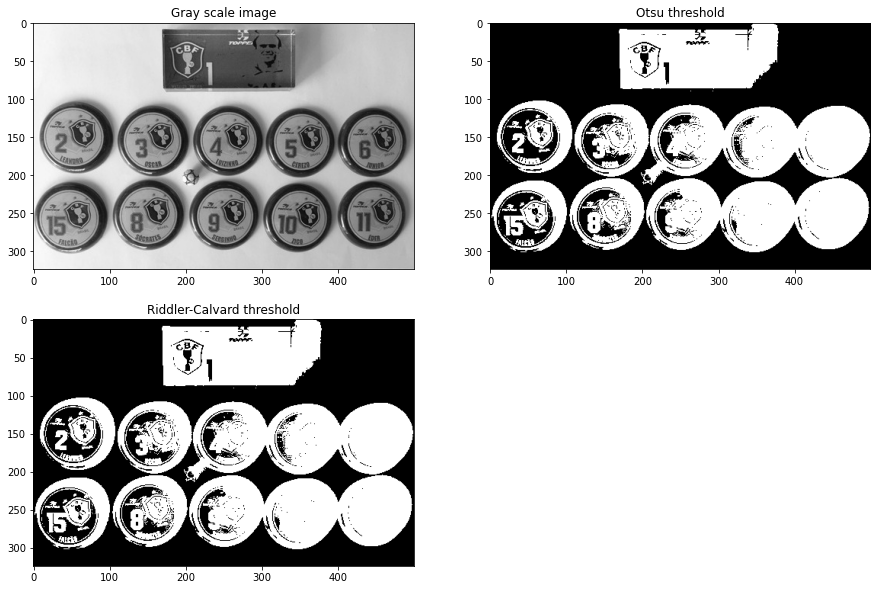

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Otsu threshold")
plt.imshow(cv2.cvtColor(othresh, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Riddler-Calvard threshold")
plt.imshow(cv2.cvtColor(rcthresh, cv2.COLOR_BGR2RGB))
plt.show()